# BIOE97142 Programming Exam 2022

This exam consists of **four** parts focusing on:

(a) Setting up and loading data into a Pandas dataframe <br>
(b) Calculating descriptive statistics <br>
(c) Data visualization <br>
(d) Performing inferential statistics <br>

*Note*: All parts use the same dataset for each section

**Exam total of 40 points**

5 points - Part (a) <br> 
10 points - Part (b) <br>
10 points - Part (c) <br>
10 points - Part (d) <br> 
5 points - Overall code legibility (Commenting)

You will have a total of **30 minutes** to complete this exam.
    

### Part (a) - Setting up and Loading Data:

1. Import numpy, matplotlib.pyplot, pandas, and scipy.stats **(1 point)**
<br>

2. Load the file "exam_data_2022.xlsx" into a Pandas dataframe   **(3 points)**
<br>

3. Show the dataframe in the Jupyter Notebook output **(1 point)**
______________________________________________________________________________________________________________________

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

df = pd.read_excel('exam_data_2022.xlsx')
df.head()

,Unnamed: 0,Time (min),Material 1 Sample 1 (uM),Material 1 Sample 2 (uM),Material 1 Sample 3 (uM),Material 2 Sample 1 (uM),Material 2 Sample 2 (uM),Material 2 Sample 3 (uM),Material 3 Sample 1 (uM),Material 3 Sample 2 (uM),Material 3 Sample 3 (uM)
0,NaN,1,0.0,0.2,0.1,4.2,6.9,7.2,2.3,4.3,1.9
1,NaN,5,1.4,3.1,2.1,10.4,13.8,12.3,20.8,22.7,24.1
2,NaN,10,3.2,5.7,4.8,20.6,24.7,25.8,40.2,50.8,43.2
3,NaN,15,5.8,7.9,6.3,25.8,30.3,31.8,55.6,62.8,63.9
4,NaN,30,8.9,10.3,9.4,31.8,33.2,34.2,63.8,67.9,70.1


### Part (b) - Descriptive Statistics:

#### Important: Ensure that you read the column labels in the dataset! 

#### Each column corresponds to drug release values measured at a time point (specified in the 'Time' column). The first column is the 'Time' column. The next three (3) columns correspond to the drug release data from three samples of Material 1, the following three (3) columns correspond to drug release data from three samples of Material 2, and so on for Material 3. 


1. Find the mean and standard deviation at the final time (t = 120 minutes) for each material type                        **(4 points)**
<br>

2. Use for loops and if statements to find which values at the final time (t = 120 minutes) are more or less than one (1) standard deviations away from their respective means for each material type       **(4 points)**
<br>    
3. Print these values, their material and sample number, and the difference between the value and mean to your Jupyter Notebook output                                            **(2 points)**

______________________________________________________________________________________________________________________

In [249]:
# axis=1 specifies I am only interested in adding rows, axis=0 is adding columns, leaving axis unspecified adds all values together across rows and columns
# iloc[0] specifiec that I am interested in taking the first integer (basically just insuring that my array only has the values I am looking for)
means = [df[df['Time (min)'] == 120][[f'Material {i+1} Sample {j+1} (uM)' for j in range(3)]].mean(axis=1).iloc[0] for i in range(3)]
stds = [df[df['Time (min)'] == 120][[f'Material {i+1} Sample {j+1} (uM)' for j in range(3)]].std(axis=1).iloc[0] for i in range(3)]

# these would be for taking a total mean across all times
#means1 = [df[[f'Material {i+1} Sample {j+1} (uM)' for j in range(3)]].mean().iloc[0] for i in range(3)]
#stds1 = [df[[f'Material {i+1} Sample {j+1} (uM)' for j in range(3)]].std().iloc[0] for i in range(3)]

means, stds

for i in range (3):
    for j in range (3):
        val = df[df['Time (min)'] == 120][[f'Material {i+1} Sample {j+1} (uM)']].iloc[0].iloc[0]    # Not sure why I need to double iloc[0]
        diff = np.abs(val - means[i])
        if diff > stds[i]:
            print(f'Material {i+1} Sample {j+1} has value: {val}, it is more than one standard deviation away with a difference with the mean is: {diff: .2f}')

Material 1 Sample 1 has value: 10.8, it is more than one standard deviation away with a difference with the mean is:  0.43
Material 2 Sample 1 has value: 36.8, it is more than one standard deviation away with a difference with the mean is:  1.90
Material 3 Sample 1 has value: 70.2, it is more than one standard deviation away with a difference with the mean is:  3.10


### Part (c) - Data Visualization:
    
Plot the data using appropriate labelling (**must include** x-axis title, y-axis title, title, legend) in a single **vertical** figure (i.e. with one plot on top of the other) using the following as subplots: <br>

*Note*: **Time** is measured in **minutes** and **Drug concentration** is measured in **uM**
    
1. Subplot 1 - Plot each sample column for all materials as a separate line on the same plot (Y-axis = Drug concentration, X-axis = Time) **(5 points)**
<br>
    
2. Subplot 2 - Plot the mean of each timepoint for the three material types as errorbar plots with standard deviations as error values (Y-axis = Drug concentration, X-axis = Time)        **(5 points)**
                                              
______________________________________________________________________________________________________________________

Text(0.5, 0, 'Time (min)')

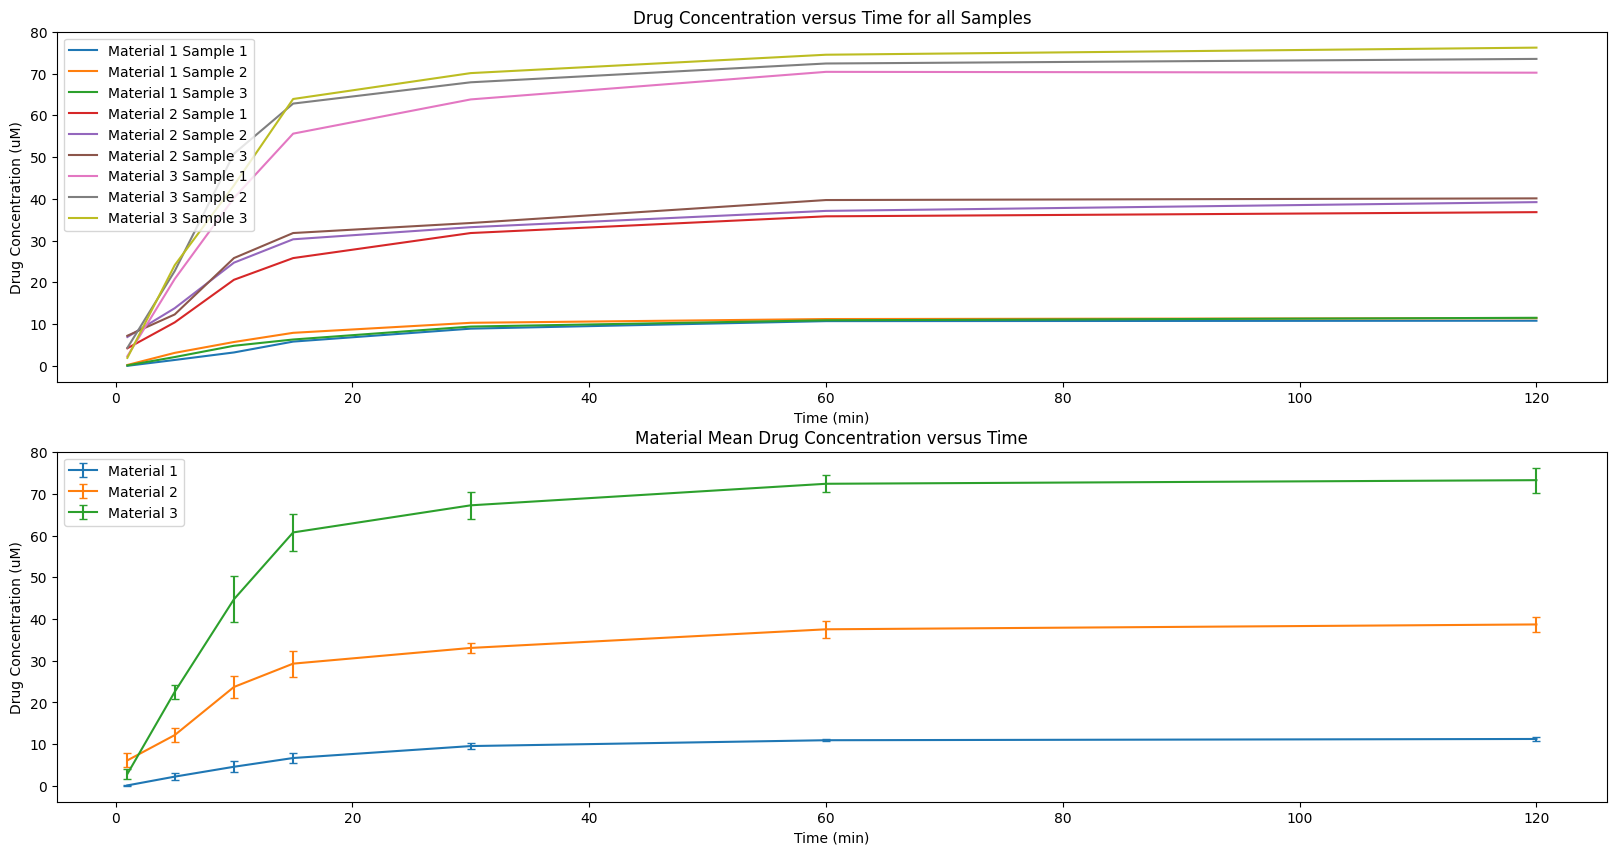

In [250]:
plt.figure (figsize=(20,10))

plt.subplot(211)
for i in range (3):
    for j in range (3):
        plt.plot(df['Time (min)'], df[f'Material {i+1} Sample {j+1} (uM)'], label = f'Material {i+1} Sample {j+1}')
        plt.legend()
plt.title('Drug Concentration versus Time for all Samples')
plt.ylabel('Drug Concentration (uM)')
plt.xlabel('Time (min)')

plt.subplot(212)
for i in range(3):  # Looping with step size of 3 to select columns for each material
    mean_values = df[[f'Material {i+1} Sample {j+1} (uM)' for j in range(3)]].mean(axis=1)
    std_values = df[[f'Material {i+1} Sample {j+1} (uM)' for j in range(3)]].std(axis=1)
    
    # Plot the mean with error bars (standard deviation as error bars)
    plt.errorbar(df['Time (min)'], mean_values, yerr=std_values, capsize=3, label=f'Material {i+1}')
    plt.legend()
plt.title('Material Mean Drug Concentration versus Time')
plt.ylabel('Drug Concentration (uM)')
plt.xlabel('Time (min)')

### Part (d) - Inferential Statistics:
    
1. Determine if the data points at the final time (t = 120 minutes) for each material type are normally distributed using a Shapiro-Wilk test    **(2 points)**
<br>

2. Run a one way ANOVA between these same data points (α = 0.05)                **(2 points)**
<br>  

3. Perform Bonferroni Correction post-hoc tests to determine inter group significance for all possible combinations of these same data points (i.e. between Material 1, Material 2, and Material 3)   **(4 points)**
<br>  

4. Comment on the results of the post-hoc test                                             **(2 points)**

______________________________________________________________________________________________________________________

In [251]:
# Shapiro test used as a measure of normality
# If p-value < than 0.05 data is likely not normally distributed
for i in range(2, 11, 3):
    print(stats.shapiro(df.iloc[-1, i:i+3]))

# Normal ANOVA since data is normally dsitributed
print(stats.f_oneway(*[df.iloc[-1,i:i+3] for i in range(2,11,3)]))

# Bonferroni Correction
ca = 0.05 / 3   # Alpha divided by number of comparisons
print(f"Corrected alpha level: {ca}")

# What is this doing?
# Selects i and j values for starting column number of each material
for i, j in [(2,5), (2,8), (5, 8)]:
    if stats.ttest_ind(df.iloc[-1, i:i+3], df.iloc[-1, j:j+3]).pvalue < ca: # T-Test comparing values at time = 120 for each material (selects time = 120 by saying we want the last row)
        print(f"Significant difference between {i // 3 + 1} and {j // 3 + 1}")

ShapiroResult(statistic=np.float64(0.8546511627906974), pvalue=np.float64(0.25296964896583074))
ShapiroResult(statistic=np.float64(0.9355670103092777), pvalue=np.float64(0.5098448100468218))
ShapiroResult(statistic=np.float64(0.9966777408637878), pvalue=np.float64(0.8898564939948094))
F_onewayResult(statistic=np.float64(720.4777931034394), pvalue=np.float64(7.129977325553553e-08))
Corrected alpha level: 0.016666666666666666
Significant difference between 1 and 2
Significant difference between 1 and 3
Significant difference between 2 and 3
